In [94]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 60)
myData=pd.read_csv('imputedData.csv')
myData.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [95]:
#One hot encoding of categorical variables

#Create list with features to be dummified cols.
nonum_feats_names = ['Month','OperatingSystems','Browser','Region','VisitorType','Weekend']


dataModel = pd.concat([myData[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']],
                       pd.get_dummies(myData[nonum_feats_names].astype('category')),myData['Revenue']],axis=1)
                      
dataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 57 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
TrafficType                      12330 non-null int64
SpecialDay                       12330 non-null float64
Month_Aug                        12330 non-null uint8
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar    

In [96]:
#Label Encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
myData['Revenue'] = le.fit_transform(myData['Revenue'])
myData['Revenue'].value_counts()

myData['Revenue'].head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [97]:
# getting dependent and independent variables

x = dataModel
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = myData['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 56)
Shape of y: (12330,)


In [98]:
# splitting the data

from sklearn.model_selection import train_test_split

x_baseTrain, x_baseTest, y_baseTrain, y_baseTest = train_test_split(x, y, test_size = 0.3, random_state = 42)

# checking the shapes

print("Shape of x_train :", x_baseTrain.shape)
print("Shape of y_train :", y_baseTrain.shape)
print("Shape of x_test :", x_baseTest.shape)
print("Shape of y_test :", y_baseTest.shape)

Shape of x_train : (8631, 56)
Shape of y_train : (8631,)
Shape of x_test : (3699, 56)
Shape of y_test : (3699,)


In [99]:
#SCALING WITH STANDARD Z SCORE SCALER
#Scaling the data first fitting it and transforming the training set
#to later apply the fit to transform the test set.
from sklearn.preprocessing import StandardScaler

num_cols_names = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']

#Instantiate Satandard Scaler
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(x_baseTrain[num_cols_names]), 
                                     columns=num_cols_names, index= x_baseTrain.index)
#Integrate scaled values to the training set
for col in num_cols_names:
    x_baseTrain[col] = scaled_numfeats_train[col]
    
    
#Transform the numerical features inthe training dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(x_baseTest[num_cols_names]),
                                    columns=num_cols_names, index= x_baseTest.index)
#Integrate scaled values to the test set
for col in num_cols_names:
    x_baseTest[col] = scaled_numfeats_test[col]

C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [101]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the target
mi = mutual_info_classif(x_baseTrain, y_baseTrain)
mi

array([1.43354605e-02, 1.37819279e-02, 5.02555447e-03, 8.02514698e-03,
       1.71708624e-02, 3.43634996e-02, 1.92829660e-02, 3.94188544e-02,
       1.63463055e-01, 9.59756067e-03, 3.27409384e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.88768353e-04, 0.00000000e+00,
       6.19540911e-03, 5.01453917e-03, 1.31858774e-02, 3.91298676e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.36572374e-04,
       0.00000000e+00, 0.00000000e+00, 5.49858848e-03, 2.69067470e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.80967668e-04, 1.77015342e-03, 8.40324716e-04, 0.00000000e+00,
       0.00000000e+00, 5.98365899e-04, 0.00000000e+00, 5.54140740e-04,
       1.68970607e-03, 0.00000000e+00, 0.00000000e+00, 8.42805911e-05,
       3.04676162e-03, 0.00000000e+00, 1.01028794e-03, 9.27341297e-03,
       1.17799345e-03, 0.00000000e+00, 1.49663529e-03, 5.51544357e-04,
       0.00000000e+00, 6.92429151e-03, 3.14652524e-04, 6.39384696e-03])

In [102]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = x_baseTrain.columns
mi.sort_values(ascending=False)

PageValues                       0.163463
ExitRates                        0.039419
ProductRelated_Duration          0.034363
BounceRates                      0.019283
ProductRelated                   0.017171
Administrative                   0.014335
Administrative_Duration          0.013782
Month_Nov                        0.013186
TrafficType                      0.009598
Region_6                         0.009273
Informational_Duration           0.008025
VisitorType_Returning_Visitor    0.006924
Weekend_True                     0.006394
Month_Mar                        0.006195
OperatingSystems_6               0.005499
Informational                    0.005026
Month_May                        0.005015
Month_Oct                        0.003913
SpecialDay                       0.003274
Region_3                         0.003047
OperatingSystems_7               0.002691
Browser_5                        0.001770
Browser_12                       0.001690
Region_9                         0

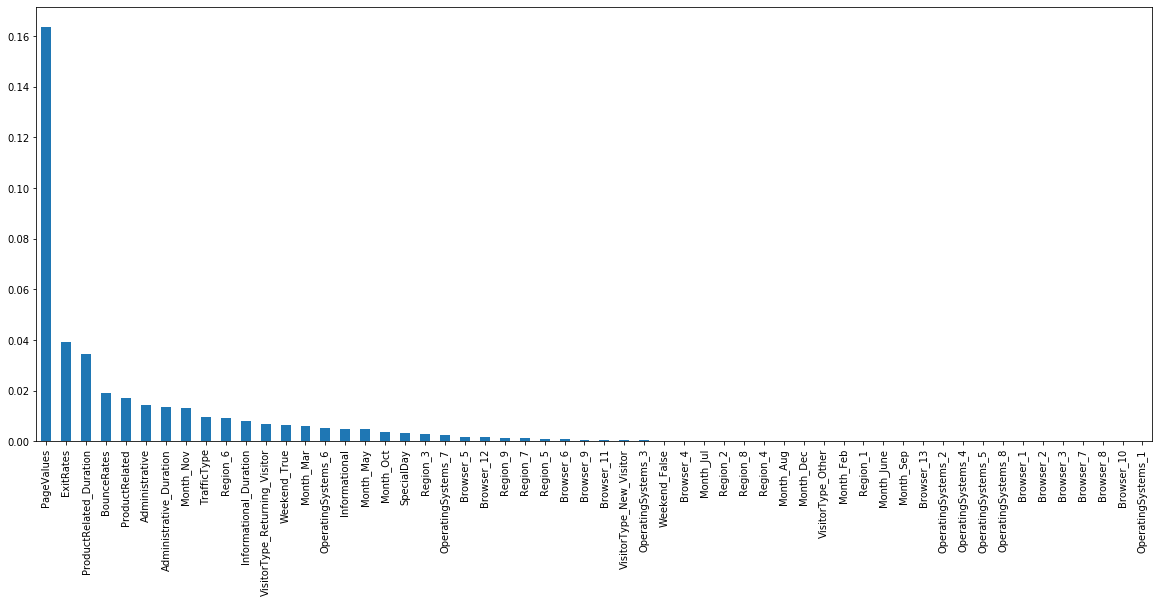

In [103]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

Where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [104]:
# here I will select the top 25 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=25).fit(x_baseTrain, y_baseTrain)
x_baseTrain.columns[sel_.get_support()]

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'TrafficType', 'SpecialDay',
       'Month_Aug', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_5',
       'Browser_4', 'Browser_12', 'Region_8', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor', 'Weekend_True'],
      dtype='object')

Below I will apply this feature selection on the correlation fixed train data just to be double sure if i am heading in right direction

x_baseTrain.drop(labels=['Browser_1','ExitRates','ProductRelated_Duration','VisitorType_Returning_Visitor'], 
                 axis=1, inplace=True)
x_baseTest.drop(labels=['Browser_1','ExitRates','ProductRelated_Duration','VisitorType_Returning_Visitor'], 
                axis=1, inplace=True)

x_baseTrain.shape, x_baseTest.shape

mi_corr = mutual_info_classif(x_baseTrain, y_baseTrain)
mi_corr
mi_corr = pd.Series(mi_corr)
mi_corr.index = x_baseTrain.columns
mi_corr.sort_values(ascending=False)

mi_corr.sort_values(ascending=False).plot.bar(figsize=(20, 8))

sel_corr = SelectKBest(mutual_info_classif, k=25).fit(x_baseTrain, y_baseTrain)
#comparing both corr fixed and normal
x_baseTrain.columns[sel_corr.get_support()]

# Inference Inference Inference from above
BounceRates/ExitRates(deleted in corr fix but has more weightage) -- should we have deleted Bounce Rates instead ??
ProductRelated/ProductRelated_Duration --Same case here -- should we have deleted ProductRelated ??
tried this in correlaton and no issues seen.
So, i am running below as final one.

In [105]:
x_baseTrain.drop(labels=['Browser_1','BounceRates','ProductRelated','VisitorType_Returning_Visitor'], 
                 axis=1, inplace=True)
x_baseTest.drop(labels=['Browser_1','BounceRates','ProductRelated','VisitorType_Returning_Visitor'], 
                axis=1, inplace=True)

x_baseTrain.shape, x_baseTest.shape

C:\Users\neera\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((8631, 52), (3699, 52))

In [106]:
mi_corr = mutual_info_classif(x_baseTrain, y_baseTrain)
mi_corr
mi_corr = pd.Series(mi_corr)
mi_corr.index = x_baseTrain.columns
mi_corr.sort_values(ascending=False)

PageValues                 0.168312
ExitRates                  0.040681
ProductRelated_Duration    0.033803
Administrative             0.016035
TrafficType                0.014259
Administrative_Duration    0.011733
Informational              0.010876
Month_Nov                  0.010863
Browser_3                  0.007610
Month_May                  0.006469
Informational_Duration     0.005725
SpecialDay                 0.005438
Month_Aug                  0.004818
OperatingSystems_2         0.004776
Weekend_False              0.004718
Browser_4                  0.004261
Region_8                   0.004147
Browser_6                  0.003854
Month_Sep                  0.003390
Month_Mar                  0.003153
Month_Dec                  0.002951
VisitorType_New_Visitor    0.002481
Month_Feb                  0.002125
Region_6                   0.001991
Browser_8                  0.001962
OperatingSystems_1         0.001853
Weekend_True               0.001746
Browser_7                  0

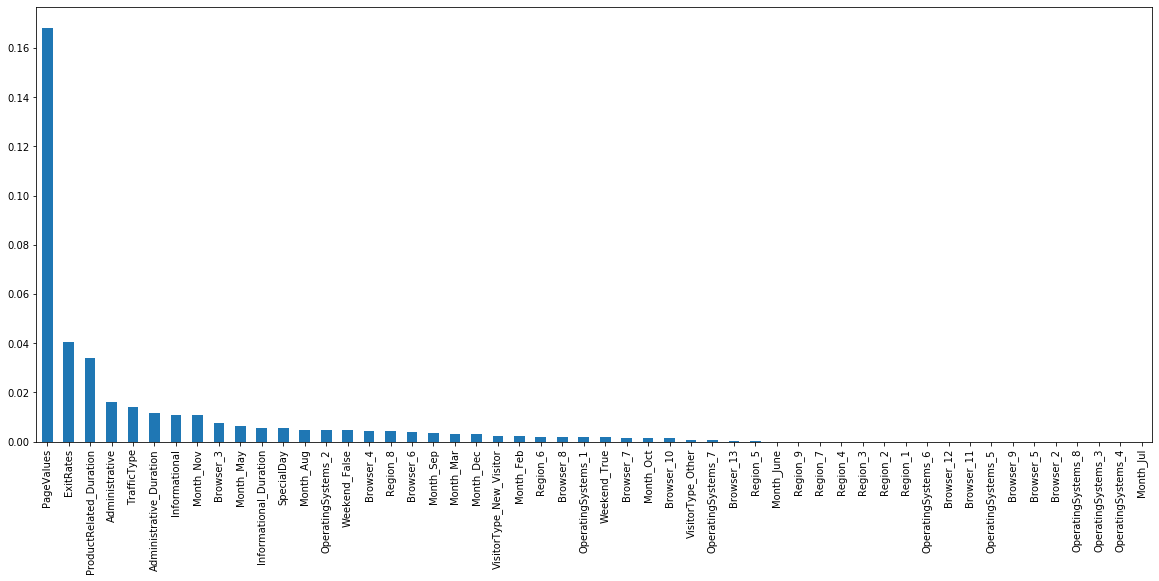

In [107]:
mi_corr.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [108]:
sel_corr = SelectKBest(mutual_info_classif, k=25).fit(x_baseTrain, y_baseTrain)
#comparing both corr fixed and normal
x_baseTrain.columns[sel_corr.get_support()]

Index(['Administrative', 'Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'ExitRates', 'PageValues', 'TrafficType',
       'SpecialDay', 'Month_Dec', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_6', 'Browser_4', 'Browser_7', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_13', 'Region_2', 'Region_7',
       'Region_8'],
      dtype='object')

# FINAL FEATURES

Administrative
Administrative_Duration
Informational_Duration
ProductRelated_Duration
ExitRates
PageValues
TrafficType
SpecialDay
Month_Dec
Month_Mar
Month_May
Month_Nov
Month_Oct
OperatingSystems_2
OperatingSystems_3
OperatingSystems_6
Browser_4
Browser_7
Browser_9
Browser_10
Browser_11
Browser_13
Region_2
Region_7
Region_8